In this notebook, we will 
- Make a Support Vector Regression (SVR) model with 59 Rdkit descriptors
- Predict the ERed of molecules in the test dataset
- save the model with pickle package

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# import custom functions from the python file
import sys
sys.path.append('../') # path of the directory that contains Chemfunctions.py
import Chemfunctions as chemfun


# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# RDKit 
import rdkit.Chem as Chem

Get train and test data from the Data directory
- train and test data features are already scaled using 0_Features_split.ipynb

In [2]:
X_train = pd.read_csv(r'./Data/X_train_70pc_scaled.csv')
X_test = pd.read_csv(r'./Data/X_test_30pc_scaled.csv')
y_train = pd.read_csv(r'./Data/y_train_70pc_target.csv')
y_test = pd.read_csv(r'./Data/y_test_30pc_target.csv')

print(f'X_train.shape={X_train.shape}, y_train.shape={y_train.shape}')
print(f'X_test.shape={X_test.shape}, y_test.shape={y_test.shape}')

X_train.shape=(3809, 59), y_train.shape=(3809, 1)
X_test.shape=(1633, 59), y_test.shape=(1633, 1)


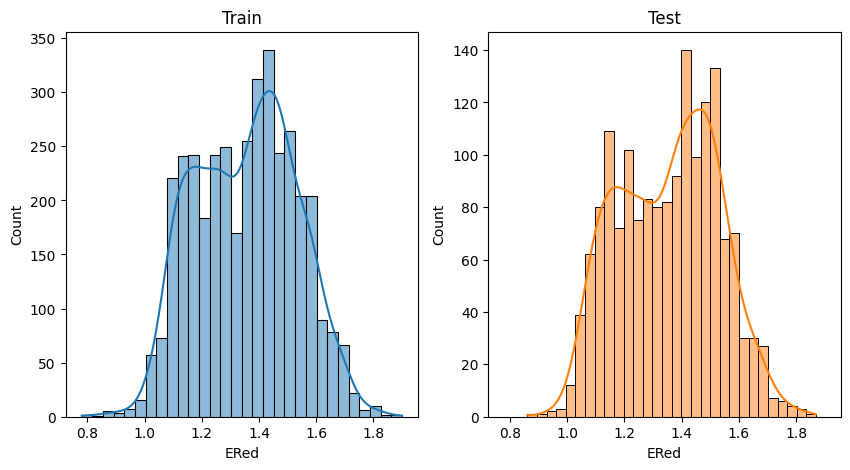

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
sns.histplot(ax=axs[0],x=y_train["ERed"], bins=30, kde=True,color="tab:blue")
sns.histplot(ax=axs[1],x=y_test["ERed"], bins=30, kde=True,color="tab:orange")
axs[0].set_xlabel("ERed")
axs[1].set_xlabel("ERed")
axs[0].set_ylabel("Count")
axs[1].set_ylabel("Count")
axs[0].set_title("Train")
axs[1].set_title("Test")
plt.show()

# SVR model

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RepeatedKFold

In [5]:
svr = SVR()
pipe = Pipeline([("svr", svr)])
param_grid = {
    "svr__kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
    'svr__C':np.arange(1,10,2)
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1,return_train_score=True,scoring='neg_mean_squared_error',cv=RepeatedKFold(n_splits=5, n_repeats=3,random_state=11))
search.fit(X_train,y_train)


c:\Users\jaina\Anaconda3\envs\datascience\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=11),
             estimator=Pipeline(steps=[('svr', SVR())]), n_jobs=-1,
             param_grid={'svr__C': array([1, 3, 5, 7, 9]),
                         'svr__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             return_train_score=True, scoring='neg_mean_squared_error')

Best model and score

In [6]:
search.best_params_, search.best_score_

({'svr__C': 1, 'svr__kernel': 'rbf'}, -0.006859013467779384)

In [7]:
model=search.best_estimator_

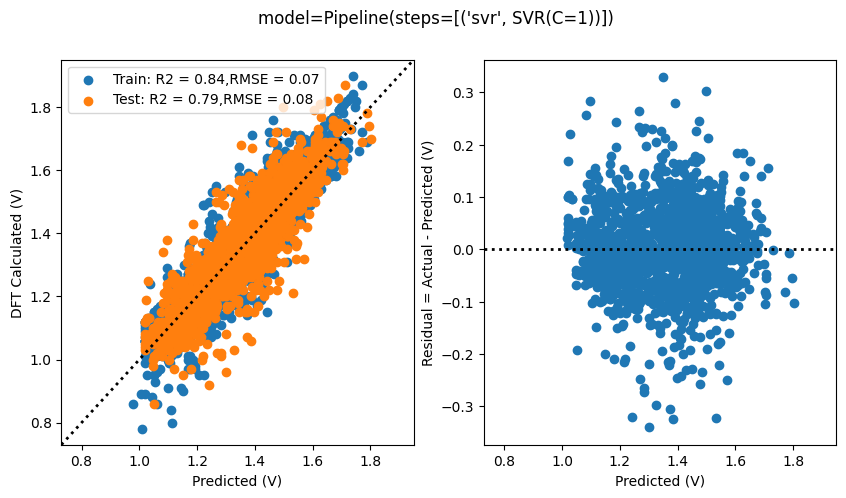

In [8]:
chemfun.pairity_plot(model=model,X_train=X_train,X_test=X_test,y_train=y_train["ERed"],y_test=y_test["ERed"])

# Overfitting with SVR

Save model

In [9]:
import pickle

pickle.dump(model, open(r'./Models/SVRegression.sav', 'wb'))